In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
df = pd.read_csv('houseprice.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
df.shape

(1460, 81)

In [16]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
nv = df.isnull().sum()
nv[nv>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [17]:
690/1460

0.4726027397260274

In [18]:
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [19]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [20]:
df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [21]:
df['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [22]:
df.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
df.shape

(1460, 76)

In [23]:
nv = df.isnull().sum()
nv[nv>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

#### Basement Related columns

In [ ]:
# BsmtQual         37
# BsmtCond         37
# BsmtExposure     38
# BsmtFinType1     37
# BsmtFinType2     38

In [28]:
df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [29]:
df['BsmtQual'].fillna('No Basement',inplace=True)
df['BsmtCond'].fillna('No Basement',inplace=True)
df['BsmtExposure'].fillna('No Basement',inplace=True)
df['BsmtFinType1'].fillna('No Basement',inplace=True)
df['BsmtFinType2'].fillna('No Basement',inplace=True)

In [30]:
nv = df.isnull().sum()
nv[nv>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

#### Garage related Columns

In [ ]:
# GarageType       81
# GarageYrBlt      81
# GarageFinish     81
# GarageQual       81
# GarageCond       81

In [34]:
df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1906.0     1
1908.0     1
1933.0     1
1900.0     1
1927.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [41]:
garage_cols = [i for i in df.columns if i.startswith('Gar') and df[i].isnull().sum()>0]
print(garage_cols)

['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [42]:
gar_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for i in gar_cols:
    df[i].fillna('No_Garage',inplace=True)

nv = df.isnull().sum()
nv[nv>0]

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
FireplaceQu    690
GarageYrBlt     81
dtype: int64

In [45]:
df['MasVnrArea'].value_counts()

0.0      861
108.0      8
72.0       8
180.0      8
16.0       7
        ... 
31.0       1
366.0      1
528.0      1
894.0      1
415.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [46]:
df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
112.0      1
138.0      1
149.0      1
38.0       1
111.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [47]:
for i in ['LotFrontage','MasVnrArea']:
    df[i].fillna(df[i].mean(),inplace=True)
    
nv = df.isnull().sum()
nv[nv>0]

MasVnrType       8
Electrical       1
FireplaceQu    690
GarageYrBlt     81
dtype: int64

In [50]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [56]:
# df['FireplaceQu'].mode().values
print(df['FireplaceQu'].mode().max())
print(df['Electrical'].mode().max())
print(df['FireplaceQu'].mode().max())

Gd
SBrkr
Gd


In [57]:
for i in ['MasVnrType', 'Electrical', 'FireplaceQu']:
    x = df[i].mode().max()
    df[i].fillna(x,inplace=True)

In [58]:
nv = df.isnull().sum()
nv[nv>0]

GarageYrBlt    81
dtype: int64

In [59]:
df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1906.0     1
1908.0     1
1933.0     1
1900.0     1
1927.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [60]:
df['GarageYrBlt'].fillna(2005.0,inplace=True)

In [61]:
nv = df.isnull().sum()
nv[nv>0]

Series([], dtype: int64)

### Correlation

In [63]:
import seaborn as sns

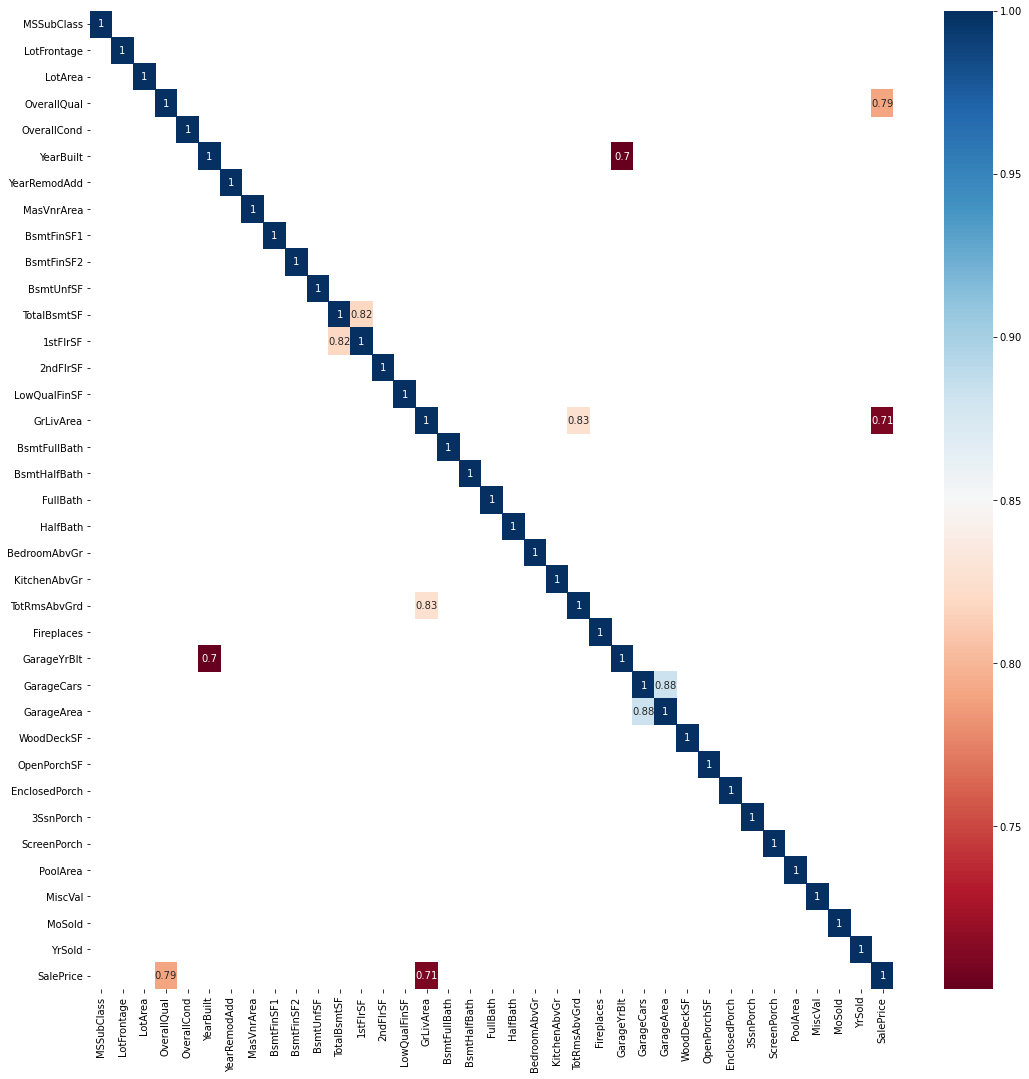

In [66]:
corr = df.corr()
corr = corr[abs(corr)>0.7]
plt.figure(figsize=(18,18))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

In [67]:
def high_corr_feat(corr,thresh):
    corr = df.corr()
    res = []
    for i in range(len(corr.columns)): # i = 0,1,2..,29
        for j in range(i):             # i=0,j=0,  i=1,j=0
            if corr.iloc[i,j] >= thresh:
                res.append(corr.columns[i])
    res = list(set(res))
    return res
    
feat_to_drop = high_corr_feat(corr,0.7)
print(feat_to_drop)

['1stFlrSF', 'SalePrice', 'TotRmsAbvGrd', 'GarageArea', 'GarageYrBlt']


### Outlier Treatment

In [69]:
# lower
df.describe(percentiles=[0.01,0.02,0.03,0.04,0.05]).T

,count,mean,std,min,1%,2%,3%,4%,5%,50%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,20.00,20.00,20.00,20.00,50.000000,190.0
LotFrontage,1460.0,70.049958,22.024023,21.0,21.00,24.00,30.00,34.00,35.95,70.049958,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,1680.00,2124.74,2522.00,3095.04,3311.70,9478.500000,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,3.00,4.00,4.00,4.00,4.00,6.000000,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,3.00,3.00,4.00,4.00,4.00,5.000000,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1899.18,1908.36,1910.00,1914.36,1916.00,1973.000000,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1950.00,1950.00,1950.00,1950.00,1950.00,1994.000000,2010.0
MasVnrArea,1460.0,103.685262,180.569112,0.0,0.00,0.00,0.00,0.00,0.00,0.000000,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,0.00,0.00,0.00,0.00,383.500000,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.00,0.00,0.00,0.00,0.000000,1474.0


In [77]:
out_cols_01 = ['LotArea', 'OverallQual', 'OverallCond','1stFlrSF','TotRmsAbvGrd',
                'GrLivArea','SalePrice']
print(out_cols_01)

['LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'TotRmsAbvGrd', 'GrLivArea', 'SalePrice']


In [78]:
def out_treat_low(x):
    x = x.clip(lower = x.quantile(0.01))
    return x

In [80]:
df[out_cols_01] = df[out_cols_01].apply(out_treat_low)

In [81]:
df.describe(percentiles=[0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,95%,96%,97%,98%,99%,max
MSSubClass,1460.0,56.897260,42.300571,20.00,50.000000,160.00,160.00,160.00,188.20,190.00,190.0
LotFrontage,1460.0,70.049958,22.024023,21.00,70.049958,104.00,107.00,114.00,120.82,137.41,313.0
LotArea,1460.0,10517.721233,9980.463435,1680.00,9478.500000,17401.15,18857.60,21571.80,25251.62,37567.64,215245.0
OverallQual,1460.0,6.104110,1.369444,3.00,6.000000,8.00,9.00,9.00,9.00,10.00,10.0
OverallCond,1460.0,5.580137,1.098826,3.00,5.000000,8.00,8.00,8.00,8.00,9.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.00,1973.000000,2007.00,2007.00,2007.00,2008.00,2009.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.00,1994.000000,2007.00,2008.00,2008.00,2008.00,2009.00,2010.0
MasVnrArea,1460.0,103.685262,180.569112,0.00,0.000000,456.00,487.40,573.69,650.82,791.28,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.00,383.500000,1274.00,1309.00,1375.99,1442.64,1572.41,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.00,0.000000,396.20,479.64,546.23,658.12,830.38,1474.0


In [82]:
out_cols_98 = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
               'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
              'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
              'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
               'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
              'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
               'SalePrice']
print(out_cols_98)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


In [83]:
def out_treat_upper(x):
    x = x.clip(upper = x.quantile(0.98))
    return x

In [84]:
df[out_cols_98] = df[out_cols_98].apply(out_treat_upper)

In [86]:
df.to_csv('2Sept_HousePrice_processed_data.csv')
df1 = df.copy()

In [87]:
df.shape

(1460, 76)

#### Label Encoding or Get Dummies

In [93]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:
lb = LabelEncoder()
for i in cat_cols:
    df[i] = lb.fit_transform(df[i])

In [101]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [104]:
x = df.drop('SalePrice',axis=1)
y = df['SalePrice']
print(x.shape)
print(y.shape)

(1460, 75)
(1460,)


In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 75)
(365, 75)
(1095,)
(365,)


In [107]:
m1 = LinearRegression()
m1.fit(x_train,y_train)
print('Training Score',m1.score(x_train,y_train))
print('Testing Score',m1.score(x_test,y_test))

Training Score 0.8910855793987772
Testing Score 0.8925554263623825


In [111]:
ypred_m1 = m1.predict(x_test)

In [114]:
def model_metric_reg(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mean_squared_error(ytest,ypred))
#     rmse = mean_squared_error(ytest,ypred,squared=False)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 Score',r2s)

In [115]:
model_metric_reg(y_test,ypred_m1)
# 0.8925554263623825

MAE 17218.492575734854
MSE 568323874.7011012
RMSE 23839.5443475982
R2 Score 0.8925554263623825


### PCA

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [120]:
print(x_train_sc.shape)
print(x_test_sc.shape)

(1095, 75)
(365, 75)


In [121]:
from sklearn.decomposition import PCA
pca = PCA()

In [122]:
x_train_pc = pca.fit_transform(x_train_sc)
x_test_pc = pca.transform(x_test_sc)
print(x_train_pc.shape)
print(x_test_pc.shape)

(1095, 75)
(365, 75)


In [123]:
eig_val = pd.DataFrame({'Eig_val':pca.explained_variance_})
eig_val.head()

,Eig_val
0,10.393863
1,4.189622
2,3.840779
3,3.004302
4,2.434168


In [127]:
eig_val['Contri'] = (eig_val['Eig_val']/eig_val['Eig_val'].sum())*100
eig_val.head()

,Eig_val,Contri
0,10.393863,14.422738
1,4.189622,5.813605
2,3.840779,5.329544
3,3.004302,4.168831
4,2.434168,3.377701


In [128]:
eig_val['CumSum'] = eig_val['Contri'].cumsum()
eig_val.head()

,Eig_val,Contri,CumSum
0,10.393863,14.422738,14.422738
1,4.189622,5.813605,20.236343
2,3.840779,5.329544,25.565887
3,3.004302,4.168831,29.734718
4,2.434168,3.377701,33.112419


In [129]:
eig_val.shape

(75, 3)

In [131]:
eig_val[eig_val['CumSum']<77].tail()

,Eig_val,Contri,CumSum
25,0.930589,1.291305,71.443284
26,0.879876,1.220935,72.664219
27,0.857633,1.190069,73.854288
28,0.842086,1.168496,75.022783
29,0.823961,1.143345,76.166128


In [133]:
pca_train = pd.DataFrame(x_train_pc)
pca_train.shape

(1095, 75)

In [134]:
pca_train = pca_train.iloc[:,:29]
pca_train.shape  # x_train

(1095, 29)

In [135]:
pca_test = pd.DataFrame(x_test_pc)
pca_test.shape

(365, 75)

In [136]:
pca_test = pca_test.iloc[:,:29]
pca_test.shape

(365, 29)

In [137]:
print(pca_train.shape)
print(pca_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 29)
(365, 29)
(1095,)
(365,)


In [138]:
m2 = LinearRegression()
m2.fit(pca_train,y_train)
print('Training Score',m2.score(pca_train,y_train))
print('Testing Score',m2.score(pca_test,y_test))

Training Score 0.8649885023378601
Testing Score 0.8978269695846304


In [139]:
ypred_m2 = m2.predict(pca_test)

In [140]:
model_metric_reg(y_test,ypred_m2)
# 0.8978269695846304

MAE 17195.444257149273
MSE 540440252.7712796
RMSE 23247.370878688187
R2 Score 0.8978269695846304
